/Users/xiaoguangliang/miniconda3/envs/MACtorch/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/xiaoguangliang/miniconda3/envs/MACtorch/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <BFAC0362-079C-3D60-A731-79532A75BA60> /Users/xiaoguangliang/miniconda3/envs/MACtorch/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/Users/xiaoguangliang/miniconda3/envs/MACtorch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/xiaoguangliang/miniconda3/envs/MACtorch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/xiaoguangliang/miniconda3/envs/MACtorch/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/Users/xiaoguangliang/miniconda3/envs/MACtorch/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality 

Resolving data files:   0%|          | 0/2665 [00:00<?, ?it/s]

/Users/xiaoguangliang/200_working/studying_in_surrey/0_Applied_Machine_Learning/coursework/faice/codes/data_exploration/preprocess_data.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


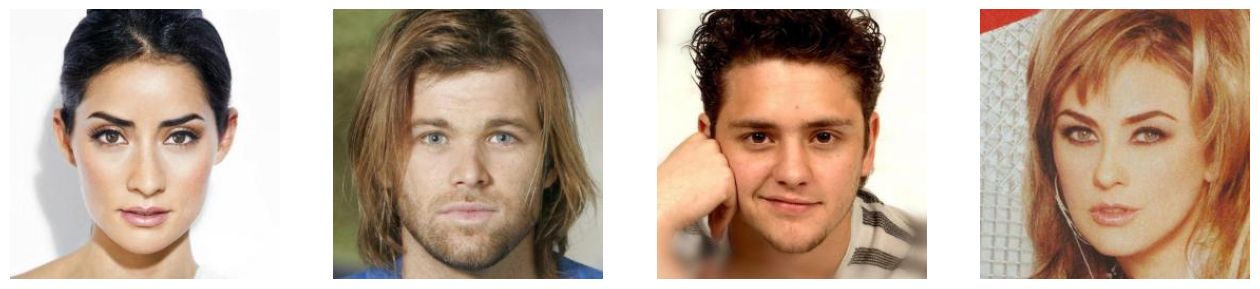

In [1]:
import os
os.chdir('../../')
from codes.data_exploration.preprocess_data import *

data_path = BASE_DIR + "/data/celeba_hq_256/"
dataset = get_data(data_path, False)
inspect_data(dataset)

Use the `add_noise` method to add some random noise to the `sample_image`

In [2]:
dataset = get_data(data_path)
sample_image = dataset[0]["images"].unsqueeze(0)
print("Input shape:", sample_image.shape)

Resolving data files:   0%|          | 0/2665 [00:00<?, ?it/s]

Input shape: torch.Size([1, 3, 128, 128])


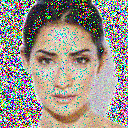

In [3]:
from diffusers import DDPMScheduler
import torch

noise_scheduler = DDPMScheduler(num_train_timesteps=1000)
noise = torch.randn(sample_image.shape)
timesteps = torch.LongTensor([50])
noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])

In [4]:
noisy_image.shape

torch.Size([1, 3, 128, 128])